# Final Project: Autostereograms

## CS445: Computational Photography

### Part I: Familiarization

In [10]:
#  Let's make some ASCII stereograms!
# Your eyes converge ( /\ ) or diverge ( \/ ) depending on the 3D depth of what they're looking at
# We can simulate looking at a single object at a distance X by looking at two identical objects at a distance less than X:


#     a  a  a  a  a  a  a  a  a  a  a  a  a 
#     b   b   b   b   b   b   b   b   b   b
#     c    c    c    c    c    c    c    c
#     d     d     d     d     d     d     d
#     c    c    c    c    c    c    c    c
#     b   b   b   b   b   b   b   b   b   b
#     a  a  a  a  a  a  a  a  a  a  a  a  a

#  There's a slight problem with the one above: the period of the 'a' is ambiguous.
#  when you look at the 'd' row, the 'a' row will appear to be the same, when it should really be closer
    
#     CloseCloseCloseCloseCloseCloseCloseClose
#     Far   Far   Far   Far   Far   Far   Far   
#     FurtherFurtherFurtherFurtherFurther
#     FurthestFurthestFurthestFurthestFurthest

In [11]:
# import libraries
import cv2
import numpy as np
from matplotlib.colors import LogNorm
from scipy import signal
%matplotlib inline  
import matplotlib.pyplot as plt
import matplotlib.animation
# define working directory
# datadir = "./" 

### Part II: Random Dot Autostereograms

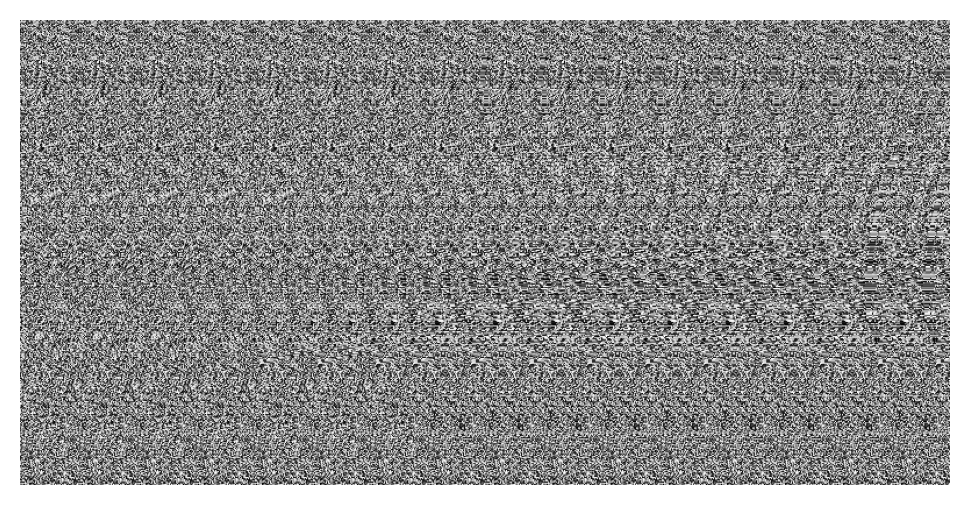

In [12]:
plt.rcParams['figure.dpi'] = 200

def make_stereogram(depth_img):

    intensity = 0.6 # intensity of 3D depth (0.0-1.0)
    patch_w = 50    # repeat-period corresponding to depth=0 in pixels
    out_size = (out_h, out_w) = (depth_img.shape[0], depth_img.shape[1]+patch_w)
    out = np.zeros(out_size).astype('double')

    for r, row in enumerate(out):
        # start with random array for row
        seed = np.random.random(patch_w)
        row[0:patch_w] = seed
        # sample remaining pixels in row based on depth
        for c in range(0, depth_img.shape[1]):
            depth = depth_img[r,c]
            offset = round(depth*patch_w*intensity)
            out[r, c+patch_w] = out[r, c+offset]
    out = out[:,patch_w:] # remove seed columns so image is centered
    return out

plt.axis('off')
depth_img = cv2.cvtColor(cv2.imread('images/shark_depth.png'), cv2.COLOR_BGR2GRAY).astype('double') / 255.0
plt.imshow(make_stereogram(depth_img), cmap='gray', vmin=0, vmax=1)
plt.show()

### Part III: Textured Autostereograms

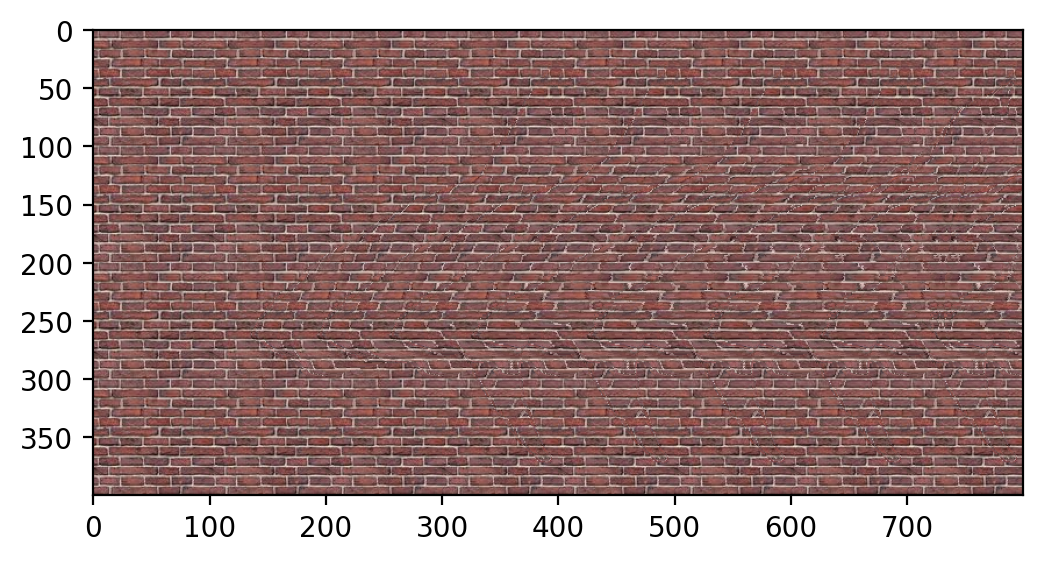

In [13]:
plt.rcParams['figure.dpi'] = 200

intensity = 0.6 # intensity of 3D depth (0.0-1.0)
depth_img = cv2.cvtColor(cv2.imread('images/shark_depth.png'), cv2.COLOR_BGR2GRAY).astype('double') / 255.0
tex_img = cv2.cvtColor(cv2.imread('images/bricks.jpg'), cv2.COLOR_BGR2RGB) / 255.0
patch_w = tex_img.shape[1]
out_size = (out_h, out_w) = (depth_img.shape[0], depth_img.shape[1]+patch_w)
out = np.zeros((*out_size,3)).astype('double')

for r, row in enumerate(out):
    # seed is now a row of the given texture
    seed = tex_img[r % tex_img.shape[0], 0:patch_w]
    row[0:patch_w] = seed
    # sample remaining pixels in row based on depth
    for c in range(0, depth_img.shape[1]):
        depth = depth_img[r,c]
        offset = round(depth*patch_w*intensity)
        out[r, c+patch_w] = out[r, c+offset]
out = out[:,patch_w:] # remove seed columns so image is centered

plt.imshow(out, cmap='gray', vmin=0, vmax=1)
plt.show()

### Extensions

In [14]:
# %matplotlib qt
# plt.rcParams['figure.dpi'] = 200
# plt.grid(b=None)
# # plt.ion()
# fig = plt.figure()


# depth_img = cv2.cvtColor(cv2.imread('shark_depth.png'), cv2.COLOR_BGR2GRAY).astype('double') / 255.0
# out_size = (out_h, out_w) = (depth_img.shape[0], depth_img.shape[1])


# for shift in range(-200, 200, 20):
#     # shift = -50
#     out = np.zeros(out_size).astype('double')
#     for r in range(out_h):
#         for c in range(out_w):
#             z = depth_img[r,c]
#             s = max(min(c+int(z*shift), out_w-1),0)
#             out[r,c] = depth_img[r,s]

#     plt.imshow(make_stereogram(out), cmap='gray', vmin=0, vmax=1)
#     fig.canvas.draw()
#     fig.canvas.flush_events()
#     plt.clf()